<a href="https://colab.research.google.com/github/sautiw/Numerical-Methods/blob/main/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project 7

Saurabh Tiwari

Salin Giri

Rahul Gauli

# Integration

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math

In [ ]:
# we define the function f in a function so that it can be easily modified
# when needed
def f(x):
    return np.sin(x)

In [ ]:
a = math.pi/3  # left boundary of the integral
b = 4*math.pi/3  # right boundary of the integral
x_limits = [0, 2*math.pi] # xlimits of the plots

In [ ]:
# calculate the value of the integral using the scipy library
integrate.quad(np.sin, a,b)

(1.0000000000000007, 2.2220880938671468e-14)

In [ ]:
# this function plots the curve and shades the area to be calculated
def plot_function(f, a, b, x_limits):
  """
  f: function to be plotted
  a and b: boundaries of the integral to be calculated
  x_limits: limits of the plot
  """
    ax = plt.figure().add_subplot()
    x = np.arange(x_limits[0], x_limits[1] + 0.1, .1)
    ax.plot(x, f(x), 'blue', label="f(x)")
    ax.axhline(color='k', linewidth=0.8, label="x-axis")
    x_fill = np.arange(a, b+0.05, 0.05)
    y = np.arange(0, f(a), 0.01)
    x = np.ones_like(y)*a
    ax.plot(x, y, 'blue', linewidth=0.8)
    y = np.arange(f(b), 0, 0.01)
    x = np.ones_like(y)*b
    ax.plot(x, y, 'blue', linewidth=0.8)
    y_fill = f(x_fill)
    ax.fill_between(x_fill, y_fill, color="cyan")
    x = [a, b]
    y = [0, 0]
    ax.scatter(x, y, marker="|", linewidths=2, edgecolors='k', facecolors='k')
    point_names = ["a", "b"]
    for i, txt in enumerate(point_names):
        ax.annotate(txt, (x[i], y[i]))
    ax.legend()
    return ax

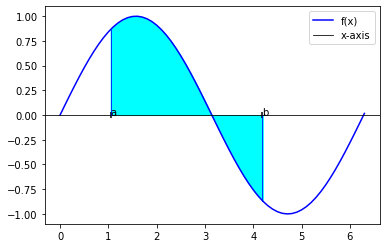

In [ ]:
plot_function(np.sin, math.pi/3, 4*math.pi/3, [0, 2* math.pi])
plt.show()

In [ ]:
def deltax(a, b, n):
  return (b-a)/n

In [ ]:
# this function plots the rectangles of the reimann integral.
def plot_reiman_rectangles(function, a, b, n, x_limits, indicator):
    dx = deltax(a, b, n)
    ax = plot_function(function, a, b, x_limits)
    if indicator == 'right':
        start = 1
    elif indicator == 'left':
        start = 0
    elif indicator == 'mid':
        start = 0.5
    for j in np.arange(start, n + start):
        rect_origin_x = a+(j-start)*dx
        rect_height = function(a + j * dx)
        ax.add_patch(Rectangle([rect_origin_x, 0], dx, rect_height, fill=False))
        x = np.arange(rect_origin_x, rect_origin_x + dx+0.01, 0.01)
        y_fill1 = f(x)
        y_fill2 = np.ones_like(x) * rect_height
        ax.fill_between(x, y_fill1, y_fill2, color="yellow")
    return ax

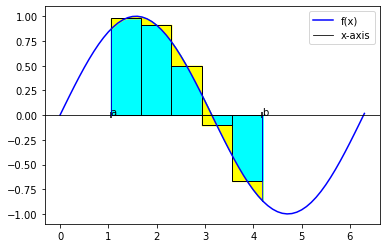

In [ ]:
fig = plot_reiman_rectangles(f, a, b, 5, x_limits, "mid")
plt.show()

### Numerical Integration: Riemann Sum

In [ ]:
#calculates the integral using the Reiamnn sum
def riemannSum(function,a,b,n,indicator = 'right'):
  dx = deltax(a,b,n)
  if indicator == 'right':
    start = 1
  elif indicator == 'left':
    start = 0
  elif indicator == 'mid':
    start = 0.5
  sum = 0
  for j in np.arange(start,n+start):
    sum = sum + function(a + j*dx)*dx
  return sum

### Trapazoid Rule

In [ ]:
# this function plots one trapezoid of the trapezoidal integral.
def plot_trapezoid(ax, x1, delta_x, f):
    y1 = f(x1)
    x2 = x1 + delta_x
    y2 = f(x2)
    y = np.arange(min(0, y1), max(y1, 0)+0.01, 0.01)
    x = np.ones_like(y) * x1
    ax.plot(x, y, 'k', linewidth=0.8)
    y = np.arange(min(0, y2), max(y2, 0) +0.01, 0.01)
    x = np.ones_like(y) * x2
    ax.plot(x, y, 'k', linewidth=0.8)
    slope = (y2-y1)/delta_x
    x = np.arange(x1, x2, 0.01)
    y = slope * (x - x1) + y1
    ax.plot(x, y, 'k', linewidth=0.8)
    y_fill1 = f(x)
    ax.fill_between(x, y_fill1, y, color="yellow")

In [ ]:
# this function plots all the trapezoids of the trapezoidal integral.
def plot_trapezoids(function, a, b, n, x_limits):
    dx = deltax(a, b, n)
    ax = plot_function(function, a, b, x_limits)
    for j in np.arange(0, n):
        trap_origin_x = a+j*dx
        plot_trapezoid(ax, trap_origin_x, dx, function)
    return ax

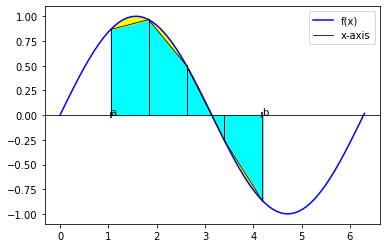

In [ ]:
fig = plot_trapezoids(f, a, b, 4, x_limits)
plt.show()

In [ ]:
#calculates the integral using trapezoidal rule
def trap (function, a, b, n):
  dx = deltax(a,b,n)
  sum = 0
  for i in range(1, n):
    sum = sum + 2*function(a+i*dx)
  for i in [a,b]:
    sum = sum +function(i)
  sum = dx/2 *sum
  return sum

In [ ]:
# computing the integral using trapezoidal rule for different number of intervals/bins
def calculate_relative_error(integration_function, f, a, b, expected_value, indicator=None):
  nb_of_bins = [5, 10, 100, 1000, 10000]
  print("nb of bins\tcorresponding error")
  for i in nb_of_bins:
    if indicator is not None:
      actual_value = integration_function(f, a, b, i, indicator)
    else:
      actual_value = integration_function(f, a, b, i)
    error = (actual_value - expected_value) / expected_value
    print(f"{i}\t\t\t{error}")

In [ ]:
calculate_relative_error(riemannSum, f, a, b, 1, "mid")



nb of bins	corresponding error
5			0.016640738463052696
10			0.004124203953988159
100			4.112453549254269e-05
1000			4.1123363581085925e-07
10000			4.112330920236218e-09


In [ ]:
calculate_relative_error(trap, f, a, b, 1)

nb of bins	corresponding error
5			-0.033117200953596715
10			-0.00823823124527212
100			-8.224805627854437e-05
1000			-8.224671684819995e-07
10000			-8.22466428296309e-09


In [ ]:
a1 = 0
b1 = math.pi/2
indicators = ["left", "right", "mid"]
for indicator in indicators:
  print(indicator)
  calculate_relative_error(riemannSum, f, a, b, 1, indicator)
  print("")

left
nb of bins	corresponding error
5			0.5110226083166682
10			0.26383167338986024
100			0.027124742407235614
1000			0.0027198765791804913
10000			0.0002720616799751774

right
nb of bins	corresponding error
5			-0.5772570102238621
10			-0.28030813588040504
100			-0.027289238519790704
1000			-0.0027215215135222293
10000			-0.0002720781292951946

mid
nb of bins	corresponding error
5			0.016640738463052696
10			0.004124203953988159
100			4.112453549254269e-05
1000			4.1123363581085925e-07
10000			4.112330920236218e-09

